In [27]:
import opensoundscape as opso
from opensoundscape import Audio, Spectrogram
from opensoundscape.spectrogram import MelSpectrogram
import matplotlib.pyplot as plt
import numpy as np

### open soundscape
We create an audio_object and then we use from_audio to pass this to the Spectrogram function

In [7]:
audio_path = r'/home/ben/data/full_dataset/test_data.australia.class0.degraded_moth32.20230209_162000.wav'
audio_object = Audio.from_file(audio_path)

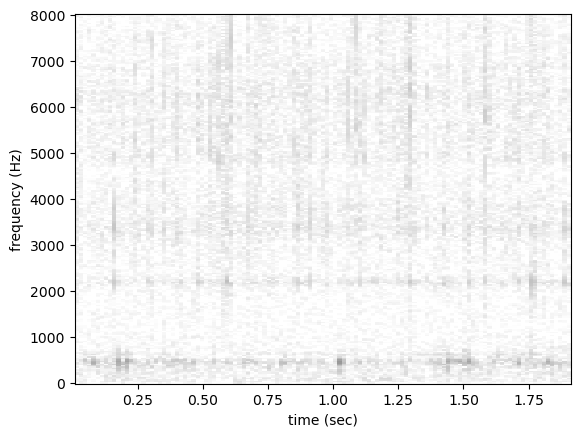

In [23]:
spec = opso.spectrogram.Spectrogram.from_audio(audio_object)
plt.ion()
spec.plot()

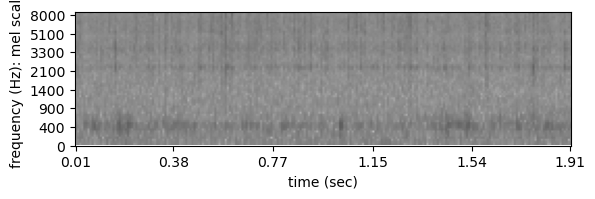

In [34]:


#post process the spectrogram from linear values to dB values:
def melspec_linear_to_db(melspec):
    melspectrogram = 10 * np.log10(
                    melspec.spectrogram,
                    where=melspec.spectrogram > 0,
                    out=np.full(melspec.spectrogram.shape, -np.inf),)

    # limit the decibel range (-100 to -20 dB by default)
    # values below lower limit set to lower limit,
    # values above upper limit set to uper limit
    min_db, max_db = melspec.decibel_limits
    melspectrogram[melspectrogram > max_db] = max_db
    melspectrogram[melspectrogram < min_db] = min_db

    return MelSpectrogram(times=melspec.times,
                          frequencies=melspec.frequencies,
                          spectrogram=melspectrogram,
                          decibel_limits=melspec.decibel_limits,
                        
    )

s=MelSpectrogram.from_audio(audio_object,decibel_limits=(-200,0),dB_scale=False, window_samples = 256) # change: window size
s = melspec_linear_to_db(s)
plt.ion()
s.plot()

In [35]:
audio_object

<Audio(samples=(30720,), sample_rate=16000)>

### next steps
- play with params to get a spectrogram that looks good, see what i use in audacity


### old code

attempting pcen

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# audio path
audio_path = r'/home/ben/reef-audio-representation-learning/data/full_dataset/test_data.australia.class0.degraded_moth32.20230209_162000.wav'

# Load the audio file
y, sr = librosa.load(audio_path, sr=None)

# Compute the mel spectrogram
mel_spec = librosa.feature.melspectrogram(y, sr=sr)

# Compute the PCEN
pcen = librosa.pcen(mel_spec)

# Plot the PCEN spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(pcen, sr=sr, x_axis='time', y_axis='mel', hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('PCEN Spectrogram')
plt.tight_layout()
plt.show()


/home/ben/miniconda3/envs/ben-python-3.9-env/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
/home/ben/miniconda3/envs/ben-python-3.9-env/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given